# Effects of Flight Characteristics on Their Delay Times

In [20]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

%matplotlib inline

## Investigation Overview

In this investigation, I wanted to look at the characteristics of flights that could be used to predict their delay's. The main focus was on three aspects: airlines, airports (origin and destination), and time (day of the week).

## Dataset Overview

Got the data from https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7, since on http://stat-computing.org/dataexpo/2009/the-data.html they weren't available anymore. Chose the 1988 data because this compressed csv file had the smallest size.

In [21]:
df = pd.read_csv('1988.csv.bz2', compression='bz2')

In [22]:
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202096 entries, 0 to 5202095
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            float64
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     int64  
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           float64
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   float64
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2646404,1988,7,13,3,1840.0,1840,1950.0,2002,UA,475,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3379013,1988,8,28,7,823.0,821,946.0,950,AA,308,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3253764,1988,8,16,2,1515.0,1515,1622.0,1625,AS,715,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1330282,1988,4,8,5,1320.0,1310,1603.0,1542,TW,756,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
20765,1988,1,18,1,843.0,830,1246.0,1218,TW,250,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Taking a sample (of 1%) of the quite big data set for faster calculations.

In [23]:
df = df.sample(frac=.01)

## 1. Airlines and their delays

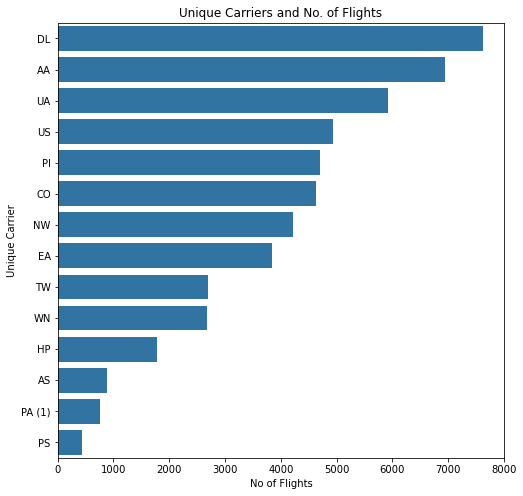

In [65]:
plt.figure(figsize = [8, 8])
color_base = sb.color_palette()[0]
ax = sb.countplot(data = df, 
             y = 'UniqueCarrier', 
             color = color_base, 
             order = df['UniqueCarrier'].value_counts().index)
ax.set(xlabel='No of Flights', ylabel='Unique Carrier')
ax.set_title('Unique Carriers and No. of Flights')
plt.show()

In [60]:
df['UniqueCarrier'].nunique()

14

In total we have 14 airlines with DL airline the top one with almost 8000 flights.

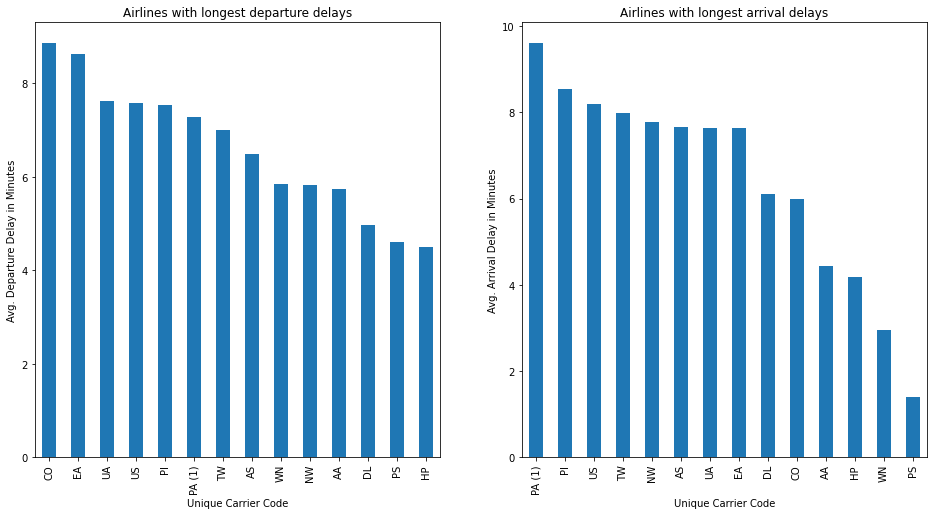

In [24]:
plt.figure(figsize = [16, 8])

plt.subplot(1, 2, 1)
df.groupby('UniqueCarrier')['DepDelay'].mean().sort_values(ascending=False).plot.bar()
plt.title('Airlines with longest departure delays')
plt.xlabel('Unique Carrier Code')
plt.ylabel('Avg. Departure Delay in Minutes');

plt.subplot(1, 2, 2)
df.groupby('UniqueCarrier')['ArrDelay'].mean().sort_values(ascending=False).plot.bar()
plt.title('Airlines with longest arrival delays')
plt.xlabel('Unique Carrier Code')
plt.ylabel('Avg. Arrival Delay in Minutes');

The CO airline has the longest average departure delay time of almost 9min.
The PA(1) airline has the longest average arrival delay time of slighlty over 9min.

## 2. Is there a relationship between arrival and departure delays?

In [54]:
df.mean()[['DepDelay','ArrDelay']], df.mean()['DepDelay'] - df.mean()['ArrDelay']

(DepDelay    6.727889
 ArrDelay    6.616515
 dtype: float64,
 0.11137349284090092)

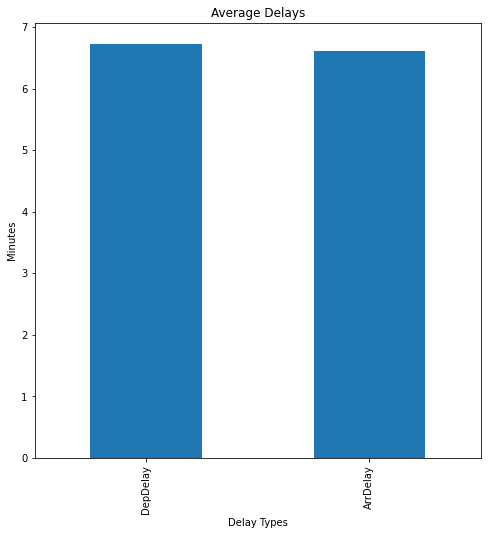

In [67]:
plt.figure(figsize = [8, 8])

df.mean()[['DepDelay','ArrDelay']].plot(kind='bar')
plt.title('Average Delays')
plt.xlabel('Delay Types')
plt.ylabel('Minutes');

On average, the arrival delay's (6.62 Minutes) differ from the departure delay's (6.73 Minutes) just a few seconds.. Therefore one could assume that there is a relationship between both variables.

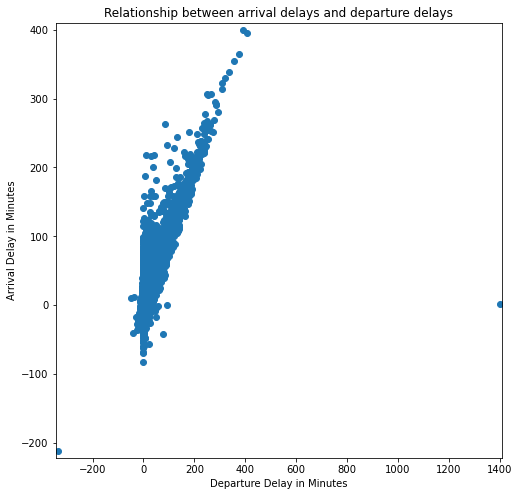

In [25]:
plt.figure(figsize = [8, 8])

plt.scatter(data = df, x='DepDelay', y='ArrDelay')
plt.title('Relationship between arrival delays and departure delays')
plt.xlabel('Departure Delay in Minutes');
plt.ylabel('Arrival Delay in Minutes');
plt.xlim(df['DepDelay'].min() - 10, df['DepDelay'].max() + 10)
plt.ylim(df['ArrDelay'].min() - 10, df['ArrDelay'].max() + 10);

Since in this plot are too many points overlapping and no clear conclusion can be derived, let's try to zoom further into the graph.

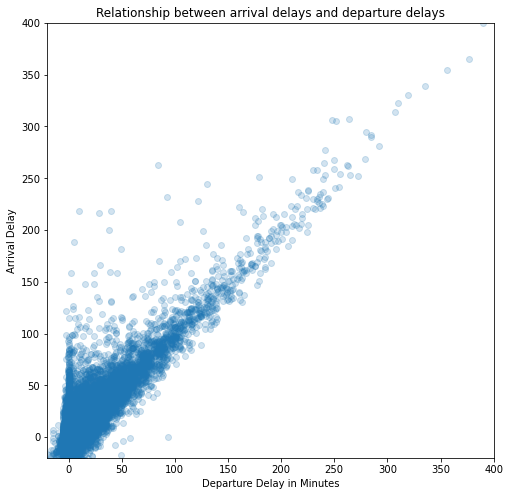

In [26]:
plt.figure(figsize = [8, 8])

plt.scatter(data = df, x='DepDelay', y='ArrDelay', alpha=1/5)
plt.title('Relationship between arrival delays and departure delays')
plt.xlabel('Departure Delay in Minutes');
plt.ylabel('Arrival Delay');
plt.xlim(-20, 400)
plt.ylim(-20, 400);

One could assume that there is a medium strong, positive, linear relationship between Departure Delay and Arrival Delay but there are too many data points overlapping so that a proper conclusion can't be stated.

## 3. Day of the Week and Delays

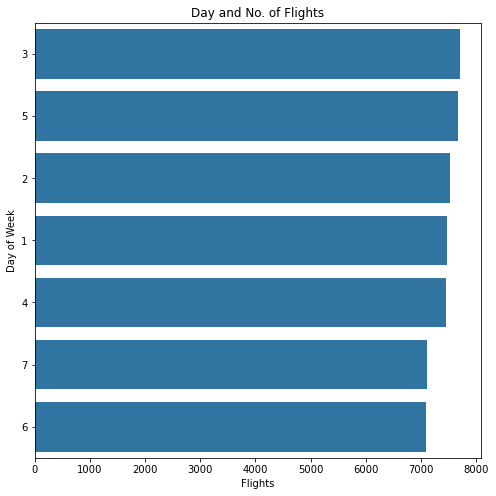

In [61]:
plt.figure(figsize = [8, 8])
color_base = sb.color_palette()[0]
ax = sb.countplot(data = df, 
             y = 'DayOfWeek', 
             color = color_base, 
             order = df['DayOfWeek'].value_counts().index)
ax.set(xlabel='Flights', ylabel='Day of Week')
ax.set_title('Day and No. of Flights')
plt.show()

Most flights are on a Wednesday, least flights are on a Saturday. This let's assume on the first view that Wednesday is the worst day to travel and delay's are longest while Saturday is the best day to travel with least delay's.

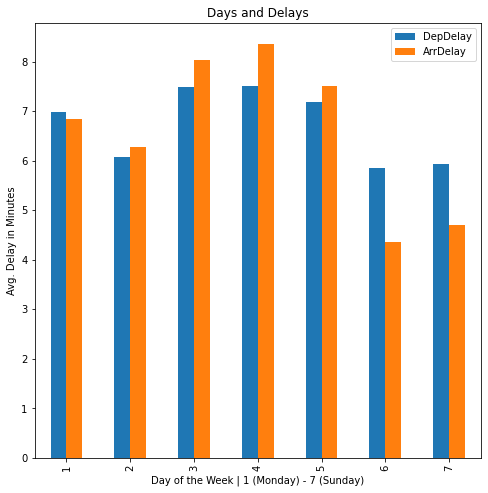

In [28]:
df.groupby('DayOfWeek').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.bar(figsize=(8,8))
plt.title('Days and Delays')
plt.xlabel('Day of the Week | 1 (Monday) - 7 (Sunday)');
plt.ylabel('Avg. Delay in Minutes');

Against our assumption made in the previous univariate data analysis of days and flights, we now see that the worst day to travel is Thursday. The least delays and thus the best day to travel is on Saturday.

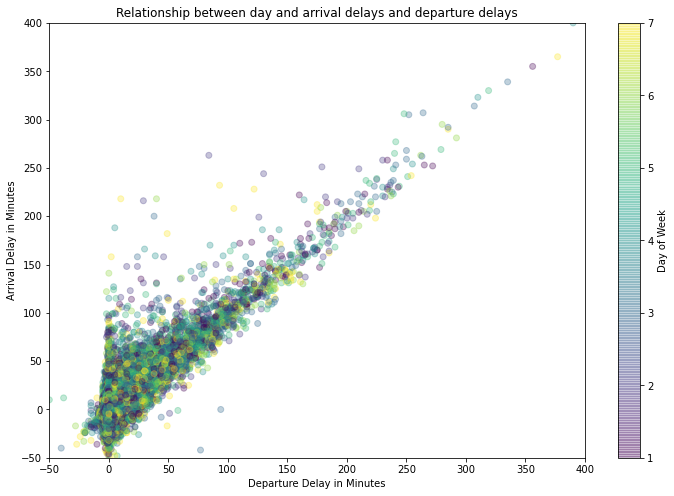

In [69]:
plt.figure(figsize = [12,8])
plt.scatter(data = df, x = 'DepDelay', y = 'ArrDelay', c = 'DayOfWeek', alpha=.3)
plt.colorbar(label = 'Day of Week')
plt.xlim(-50,400)
plt.ylim(-50,400)
plt.title('Relationship between day and arrival delays and departure delays')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Arrival Delay in Minutes');

In this multivariate data exploration no clear pattern can be recognized regarding the question if "Day of the Week" has a relationship with the length of Departure Delay and Arrival Delay. Also, too many points are overlapping each other.

## 4. Top 10 "Origin" airports and their average delay times.

In [30]:
top_origins = df['Origin'].value_counts()[1:11].index

In [31]:
df_top_origins = df[df.Origin.isin(top_origins)]

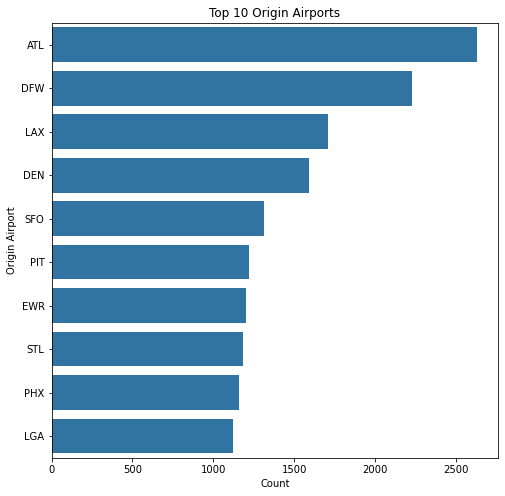

In [32]:
plt.figure(figsize = [8, 8])
color_base = sb.color_palette()[0]
ax = sb.countplot(data = df_top_origins, 
             y = 'Origin', 
             color = color_base, 
             order = df_top_origins['Origin'].value_counts().index)
ax.set(xlabel='Count', ylabel='Origin Airport')
ax.set_title('Top 10 Origin Airports')
plt.show()

Airport ATL is the top Origin airport regarding value_counts in the data set.

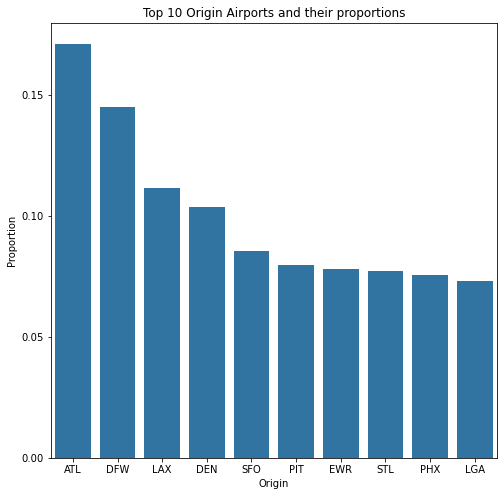

In [36]:
plt.figure(figsize = [8, 8])

n_points = df_top_origins.shape[0]
max_count = df_top_origins['Origin'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[0]
ax = sb.countplot(data = df_top_origins, 
             x = 'Origin', 
             color = base_color, 
             order = df_top_origins['Origin'].value_counts().index)
ax.set(xlabel='Origin', ylabel='Proportion')
ax.set_title('Top 10 Origin Airports and their proportions')
plt.yticks(tick_props * n_points, tick_names);

The top origin airport ATL has with slighly over 15% the biggest proportion of the top 10 favored airports.

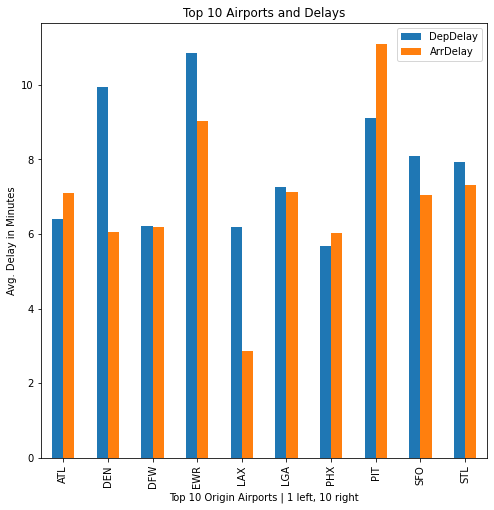

In [34]:
df_top_origins.groupby('Origin').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).plot.bar(figsize=(8,8));
plt.title('Top 10 Airports and Delays')
plt.xlabel('Top 10 Origin Airports | 1 left, 10 right');
plt.ylabel('Avg. Delay in Minutes');

From the top 10 airports (regarding value_counts) airport EWR has the highest average Departure Delay (ca. 10min) and  airport PIT has the highest average Arrival Delay (ca. 10min).